In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def extract_results_from_dir(dir_path: str):
    results = []
    for file in os.listdir(dir_path):
        single_results = {}
        if not file.startswith("_predictions_"):
            continue
        single_results["name"] = file.replace("_predictions_", "").replace(".txt", "")
        single, multi = extract_results_from_file(os.path.join(dir_path, file))

        (
            single_results["rec_num_examples"],
            single_results["fully_added"],
            single_results["true_positive"],
            single_results["avg_min_rank"],
            single_results["avg_min_smooth_rank"],
            single_results["avg_mean_rank"],
            single_results["avg_mean_smooth_rank"],
            single_results["class_num_examples"],
            single_results["area_under_roc"],
        ) = single[0]

        # for treshold, accuracy, precision, recall, f1, confusion_matrix in multi:
        #     single_results["treshold"] = treshold
        #     single_results["accuracy"] = accuracy
        #     single_results["precision"] = precision
        #     single_results["recall"] = recall
        #     single_results["f1"] = f1

        #     results.append(single_results)

        for treshold, accuracy, precision, recall, f1, confusion_matrix in multi:
            single_results[f"accuracy_{treshold}"] = accuracy
            single_results[f"precision_{treshold}"] = precision
            single_results[f"recall_{treshold}"] = recall
            single_results[f"f1_{treshold}"] = f1

        results.append(single_results)

    return pd.DataFrame.from_records(results)


def extract_results_from_file(file_path: str):
    with open(file_path, "r", encoding="utf-8") as f:
        data = f.read()
    return extract_results_from_string(data)


def extract_results_from_string(string: str):
    single_pattern = r"Recommender quality measures:\s+- Number of test examples: (?P<recommender_number_examples>\d+) \(fully added: (?P<recommender_fully_added>\d+)\)\s+- Proportion of predictions that are in actual neighbours: (?P<recommender_>\d+\.\d+)\s+- The average minimal rank \(>= 0\) of the actual neighbour: (?P<recommender_avg_min_rank>\d+\.\d+)\s+- The average minimal smooth rank \(>= 1.0\) of the actual neighbour: (?P<recommender_avg_min_smooth_rank>\d+\.\d+)\s+- The average mean rank \(>= 0\) of the actual neighbour: (?P<recommender_avg_mean_rank>\d+\.\d+)\s+- The average mean smooth rank \(>= 1.0\) of the actual neighbour: (?P<recommender_avg_maen_smooth_rank>\d+\.\d+)\s+Classification quality measures:\s+\* Number of examples: (?P<class_num_examples>\d+)\s+\* Threshold independent measures:\s+- area under ROC: (?P<class_area_under_ROC>\d+\.\d+)"

    multi_pattern = r"threshold = (?P<treshold>\d+\.\d+)\s*- accuracy: (?P<accuracy>\d+\.\d+)\s*- precision: (?P<precision>\d+\.\d+)\s*- recall: (?P<recall>\d+\.\d+)\s*- F1: (?P<f1>\d+\.\d+)\s*- confusion matrix: (?P<confusion_matrix>\[\[\d+, \d+], \[\d+, \d+]]) \(labels: \[0, 1]\)"

    single_pattern = re.compile(single_pattern)
    multi_pattern = re.compile(multi_pattern)

    single = re.findall(single_pattern, string)
    multi = re.findall(multi_pattern, string)
    return single, multi

In [3]:
dir_path = "dumps/experiments"

results = extract_results_from_dir(dir_path)

In [4]:
results[results.columns.difference(["name", "rec_num_examples", "fully_added"])] = (
    results[results.columns.difference(["name", "rec_num_examples", "fully_added"])]
).astype(float)

In [5]:
results.sort_values("area_under_roc")

,name,rec_num_examples,fully_added,true_positive,avg_min_rank,avg_min_smooth_rank,avg_mean_rank,avg_mean_smooth_rank,class_num_examples,area_under_roc,...,recall_0.25,f1_0.25,accuracy_0.75,precision_0.75,recall_0.75,f1_0.75,accuracy_0.9,precision_0.9,recall_0.9,f1_0.9
31,"GNN_p_to_keep_0.1_asts_agda_32_hidden_[64, 64]...",2916,2916,0.000000,6949.630316,1.000000,11104.313374,1.000000,39165.0,0.500000,...,1.000000,0.670299,0.495902,0.000000,0.000000,0.000000,0.495902,0.000000,0.000000,0.000000
44,GNN_p_to_keep_0.1_asts_agda_64_hidden_[32]_out...,2916,2916,0.000000,6942.905007,2.000339,11097.491025,2.001213,39165.0,0.500388,...,0.999544,0.670199,0.495953,0.750000,0.000152,0.000304,0.495953,0.750000,0.000152,0.000304
65,GNN_p_to_keep_0.1_asts_agda_16_hidden_[32]_out...,2916,2916,0.000206,6802.246228,1.985921,11077.125352,1.999495,39165.0,0.500464,...,0.999899,0.670288,0.495851,0.486842,0.001874,0.003734,0.495851,0.486842,0.001874,0.003734
17,"GNN_p_to_keep_0.1_asts_agda_32_hidden_[32, 32]...",2916,2915,0.000000,6856.523320,1.990525,11084.785181,1.999059,39165.0,0.500478,...,0.999797,0.670312,0.496285,0.674419,0.001469,0.002931,0.496285,0.674419,0.001469,0.002931
77,"GNN_p_to_keep_0.1_asts_agda_32_hidden_[32, 32]...",2916,2916,0.003841,6881.695816,1.978109,11054.711084,1.987944,39165.0,0.501366,...,1.000000,0.670299,0.497255,0.934426,0.002887,0.005756,0.497255,0.934426,0.002887,0.005756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,"GNN_p_to_keep_0.1_asts_agda_128_hidden_[64, 64...",2916,2916,0.033813,51.640604,1.003441,550.866952,1.642289,39165.0,0.968022,...,0.960188,0.886483,0.899706,0.960033,0.835841,0.893642,0.867331,0.978425,0.753432,0.851313
80,GNN_p_to_keep_0.1_asts_agda_32_hidden_[64]_out...,2916,2916,0.043553,36.693416,1.000409,535.487496,1.588039,39165.0,0.968326,...,0.961353,0.882688,0.892685,0.960636,0.820747,0.885198,0.859083,0.981582,0.734235,0.840080
4,"GNN_p_to_keep_0.1_asts_agda_64_hidden_[32, 32]...",2916,2916,0.027366,58.149177,1.001047,551.183986,1.627875,39165.0,0.968661,...,0.960796,0.891044,0.893655,0.954222,0.828800,0.887100,0.864292,0.975607,0.749531,0.847756
16,GNN_p_to_keep_0.1_asts_agda_128_hidden_[64]_ou...,2916,2916,0.032373,44.719479,1.000987,474.465494,1.564154,39165.0,0.972314,...,0.965608,0.891028,0.907673,0.960640,0.851745,0.902921,0.874812,0.978339,0.768678,0.860928


In [6]:
GNN_results = results[results["name"].str.contains("GNN")]
GNN_results

,name,rec_num_examples,fully_added,true_positive,avg_min_rank,avg_min_smooth_rank,avg_mean_rank,avg_mean_smooth_rank,class_num_examples,area_under_roc,...,recall_0.25,f1_0.25,accuracy_0.75,precision_0.75,recall_0.75,f1_0.75,accuracy_0.9,precision_0.9,recall_0.9,f1_0.9
0,"GNN_p_to_keep_0.1_asts_agda_128_hidden_[32, 32...",2916,2916,0.019547,58.040466,1.002087,608.803069,1.663927,39165.0,0.966987,...,0.959074,0.887654,0.895059,0.955003,0.830978,0.888684,0.868122,0.974853,0.757940,0.852820
2,GNN_p_to_keep_0.1_asts_agda_32_hidden_[32]_out...,2916,2916,0.017010,70.199931,1.000481,1031.210433,2.173581,39165.0,0.939045,...,0.929595,0.847322,0.857781,0.935048,0.771463,0.845415,0.829797,0.962052,0.689561,0.803328
3,"GNN_p_to_keep_0.1_asts_agda_64_hidden_[16, 16]...",2916,2916,0.015844,66.316872,1.001035,950.912024,1.969793,39165.0,0.944919,...,0.948235,0.854587,0.850760,0.932421,0.758953,0.836791,0.818052,0.965194,0.662969,0.786032
4,"GNN_p_to_keep_0.1_asts_agda_64_hidden_[32, 32]...",2916,2916,0.027366,58.149177,1.001047,551.183986,1.627875,39165.0,0.968661,...,0.960796,0.891044,0.893655,0.954222,0.828800,0.887100,0.864292,0.975607,0.749531,0.847756
5,"GNN_p_to_keep_0.1_asts_agda_32_hidden_[16, 16]...",2916,2916,0.014609,92.617284,1.001138,1332.448429,2.131173,39165.0,0.920715,...,0.928532,0.824911,0.824231,0.919762,0.713569,0.803651,0.796681,0.953775,0.627058,0.756654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"GNN_p_to_keep_0.1_asts_agda_32_hidden_[16, 16]...",2916,2916,0.018038,74.300754,1.000725,1025.595056,1.972882,39165.0,0.941098,...,0.941346,0.850105,0.849100,0.931392,0.756369,0.834805,0.816979,0.961943,0.663172,0.785093
82,GNN_p_to_keep_0.1_asts_agda_64_hidden_[16]_out...,2916,2916,0.010082,87.072702,1.002895,1504.466783,3.765287,39165.0,0.916218,...,0.935471,0.819079,0.825890,0.930972,0.707035,0.803696,0.800562,0.957586,0.632376,0.761722
83,GNN_p_to_keep_0.1_asts_agda_32_hidden_[32]_out...,2916,2916,0.013855,89.180041,1.001053,1736.696014,2.895344,39165.0,0.900229,...,0.899357,0.805681,0.816979,0.909903,0.706934,0.795679,0.789123,0.946987,0.616168,0.746571
84,GNN_p_to_keep_0.1_asts_agda_32_hidden_[32]_out...,2916,2916,0.036831,35.393004,1.000793,542.317552,1.517847,39165.0,0.967969,...,0.966115,0.881546,0.886812,0.961311,0.807983,0.878003,0.846879,0.980831,0.710125,0.823809


In [7]:
properties = {
    "embeddings_file": [],
    "embeddings_size": [],
    "hidden_size": [],
    "out_size": [],
    "n_epochs": [],
}
for name in GNN_results["name"]:
    pattern = r"GNN_p_to_keep_0.1_asts_(?P<embedding_file>\w+)_(?P<embedding_size>\d+)_hidden_(?P<hidden_size>.+)_out_(?P<out_size>\d+)_epochs_(?P<n_epochs>\d+)"
    pattern = re.compile(pattern)
    parts = re.findall(pattern, name)
    if not parts:
        parts = [("", "", "", "", "")]
    parts = parts[0]
    for key, value in zip(properties.keys(), parts):
        properties[key].append(value)

GNN_results = GNN_results.assign(**properties)
cols = list(GNN_results.columns)
cols = cols[-5:] + cols[1:-5]
GNN_results = GNN_results[cols].drop(["rec_num_examples", "fully_added"], axis=1)
GNN_results = GNN_results[GNN_results["embeddings_size"] != ""]
GNN_results[["embeddings_size", "out_size", "n_epochs"]] = GNN_results[
    ["embeddings_size", "out_size", "n_epochs"]
].astype(int)

In [8]:
GNN_results.sort_values("area_under_roc")

,embeddings_file,embeddings_size,hidden_size,out_size,n_epochs,true_positive,avg_min_rank,avg_min_smooth_rank,avg_mean_rank,avg_mean_smooth_rank,...,recall_0.25,f1_0.25,accuracy_0.75,precision_0.75,recall_0.75,f1_0.75,accuracy_0.9,precision_0.9,recall_0.9,f1_0.9
31,agda,32,"[64, 64]",64,20000,0.000000,6949.630316,1.000000,11104.313374,1.000000,...,1.000000,0.670299,0.495902,0.000000,0.000000,0.000000,0.495902,0.000000,0.000000,0.000000
44,agda,64,[32],16,20000,0.000000,6942.905007,2.000339,11097.491025,2.001213,...,0.999544,0.670199,0.495953,0.750000,0.000152,0.000304,0.495953,0.750000,0.000152,0.000304
65,agda,16,[32],16,20000,0.000206,6802.246228,1.985921,11077.125352,1.999495,...,0.999899,0.670288,0.495851,0.486842,0.001874,0.003734,0.495851,0.486842,0.001874,0.003734
17,agda,32,"[32, 32]",16,20000,0.000000,6856.523320,1.990525,11084.785181,1.999059,...,0.999797,0.670312,0.496285,0.674419,0.001469,0.002931,0.496285,0.674419,0.001469,0.002931
77,agda,32,"[32, 32]",16,5000,0.003841,6881.695816,1.978109,11054.711084,1.987944,...,1.000000,0.670299,0.497255,0.934426,0.002887,0.005756,0.497255,0.934426,0.002887,0.005756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,agda,32,[32],32,20000,0.036831,35.393004,1.000793,542.317552,1.517847,...,0.966115,0.881546,0.886812,0.961311,0.807983,0.878003,0.846879,0.980831,0.710125,0.823809
54,agda,128,"[64, 64]",64,20000,0.033813,51.640604,1.003441,550.866952,1.642289,...,0.960188,0.886483,0.899706,0.960033,0.835841,0.893642,0.867331,0.978425,0.753432,0.851313
80,agda,32,[64],64,20000,0.043553,36.693416,1.000409,535.487496,1.588039,...,0.961353,0.882688,0.892685,0.960636,0.820747,0.885198,0.859083,0.981582,0.734235,0.840080
4,agda,64,"[32, 32]",32,20000,0.027366,58.149177,1.001047,551.183986,1.627875,...,0.960796,0.891044,0.893655,0.954222,0.828800,0.887100,0.864292,0.975607,0.749531,0.847756


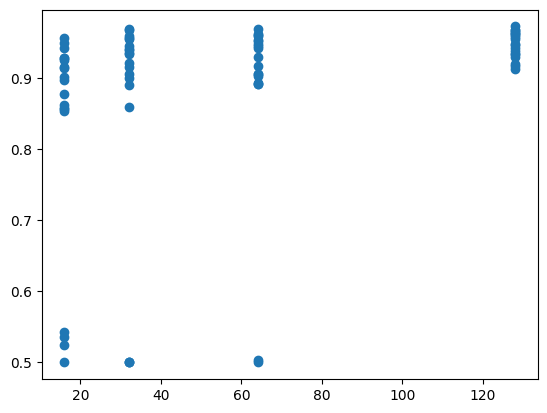

In [9]:
plt.scatter(GNN_results["embeddings_size"], GNN_results["area_under_roc"])

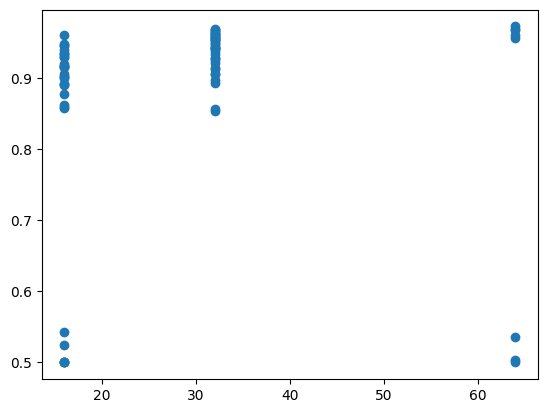

In [10]:
plt.scatter(GNN_results["out_size"], GNN_results["area_under_roc"])

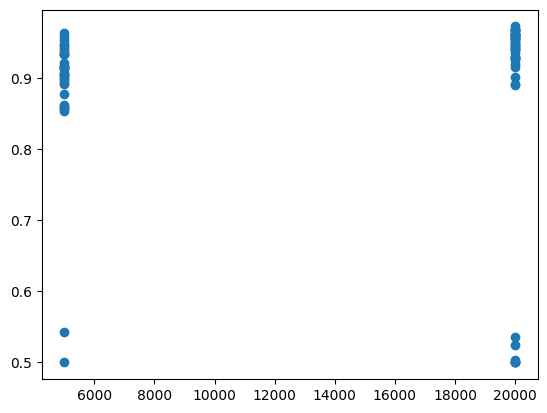

In [11]:
plt.scatter(GNN_results["n_epochs"], GNN_results["area_under_roc"])

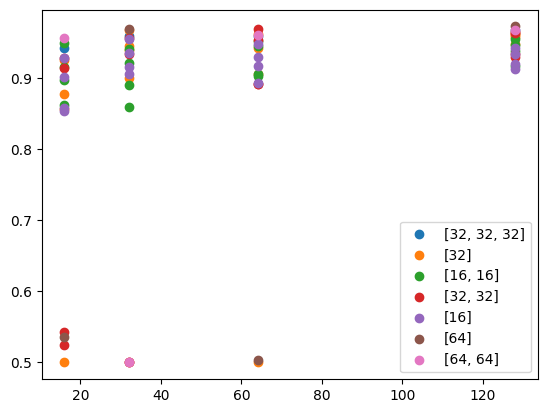

In [12]:
for h in GNN_results.hidden_size.unique():
    part = GNN_results[GNN_results["hidden_size"] == h]
    plt.scatter(part["embeddings_size"], part["area_under_roc"], label=h)
plt.legend()

Text(0, 0.5, 'Area under ROC')

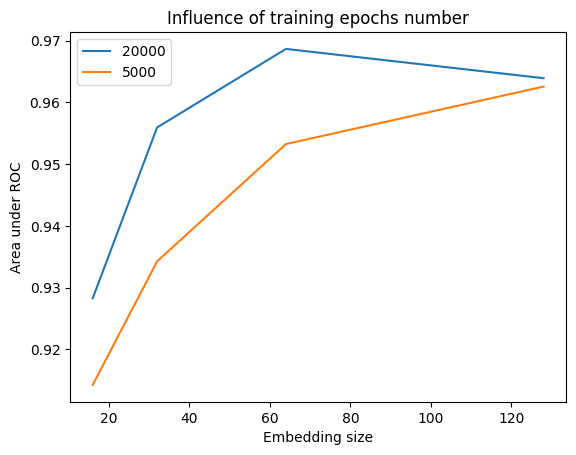

In [62]:
GNN_results = GNN_results.sort_values("embeddings_size")
for N in GNN_results.n_epochs.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == "[32, 32]")
        & (GNN_results["out_size"] == 32)
        & (GNN_results["n_epochs"] == N)
    )
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["area_under_roc"],
        label=N,
    )
plt.legend()
plt.title("Influence of training epochs number")
plt.xlabel("Embedding size")
plt.ylabel("Area under ROC")

Text(0, 0.5, 'Area under ROC')

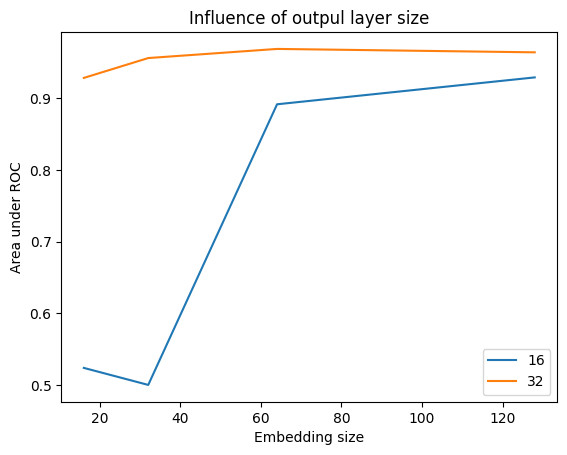

In [61]:
GNN_results = GNN_results.sort_values(["embeddings_size", "out_size"])
for N in GNN_results.out_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == "[32, 32]")
        & (GNN_results["out_size"] == N)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["area_under_roc"],
        label=N,
    )
plt.legend()
plt.title("Influence of outpul layer size")
plt.xlabel("Embedding size")
plt.ylabel("Area under ROC")

Text(0, 0.5, 'Area under ROC')

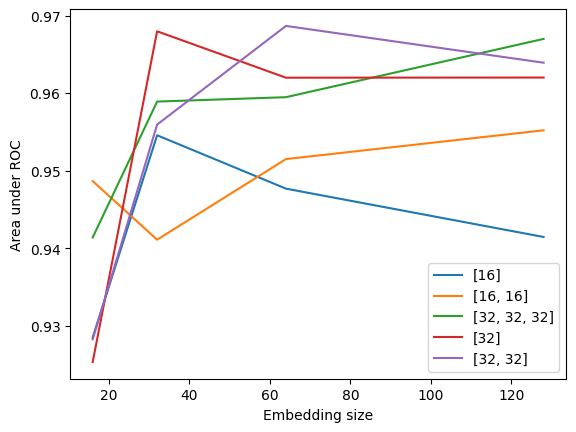

In [59]:
GNN_results = GNN_results.sort_values("embeddings_size")
for h in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == h)
        # & (GNN_results["out_size"] != 16)
        & (GNN_results["out_size"] == 32)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["area_under_roc"],
        label=h,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("Area under ROC")

In [16]:
GNN_results = GNN_results.sort_values("embeddings_size")
for h in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == h)
        & (GNN_results["out_size"] == 32)
        & (GNN_results["n_epochs"] == 20000)
    )
    criterion2 = (
        (GNN_results["hidden_size"] == h)
        & (GNN_results["out_size"] == 16)
        & (GNN_results["n_epochs"] == 20000)
    )
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["area_under_roc"].array
        - GNN_results[criterion2]["area_under_roc"].array,
        label=h,
    )
plt.legend()
plt.title("Razlika med velikostima izhodnih plasti 32 in 16")
plt.xlabel("Embedding size")
plt.ylabel("Area under ROC")

Text(0, 0.5, 'Average minimal rank')

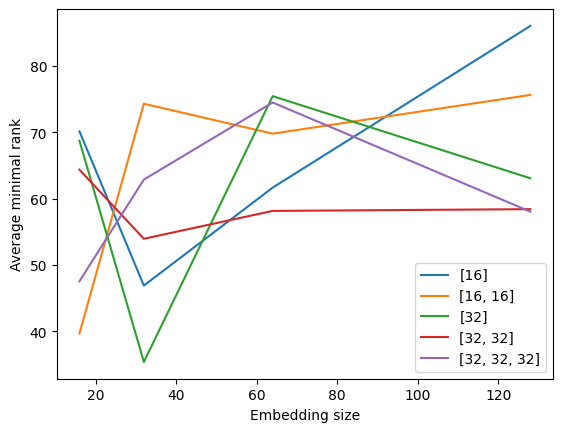

In [58]:
GNN_results = GNN_results.sort_values("embeddings_size")
for h in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == h)
        # & (GNN_results["out_size"] != 16)
        & (GNN_results["out_size"] == 32)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["avg_min_rank"],
        label=h,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("Average minimal rank")

Text(0, 0.5, 'Average mean rank')

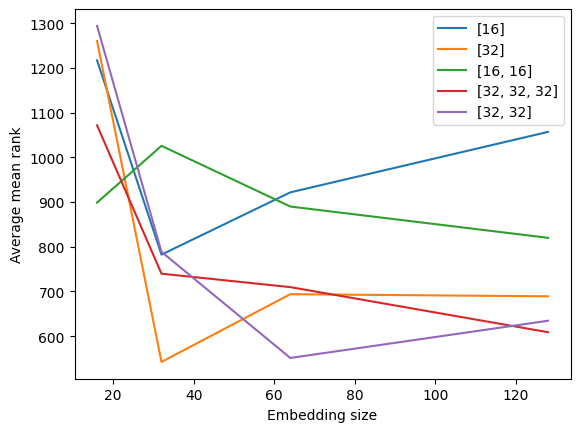

In [57]:
GNN_results = GNN_results.sort_values("embeddings_size")
for h in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == h)
        & (GNN_results["out_size"] == 32)
        # & (GNN_results["out_size"] != 16)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["avg_mean_rank"],
        label=h,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("Average mean rank")

Text(0, 0.5, 'Average minimal smooth rank')

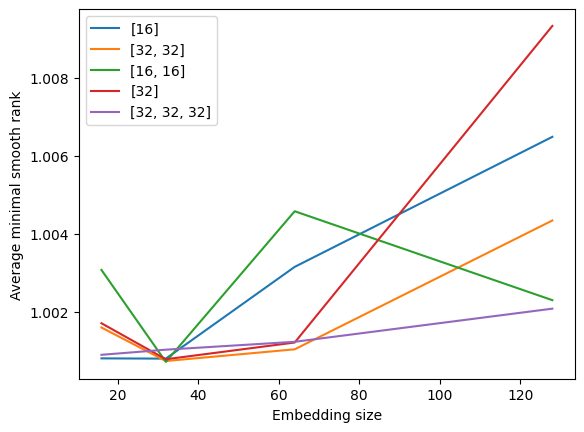

In [56]:
GNN_results = GNN_results.sort_values("embeddings_size")
for h in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == h)
        & (GNN_results["out_size"] == 32)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["avg_min_smooth_rank"],
        label=h,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("Average minimal smooth rank")

Text(0, 0.5, 'Average mean smooth rank')

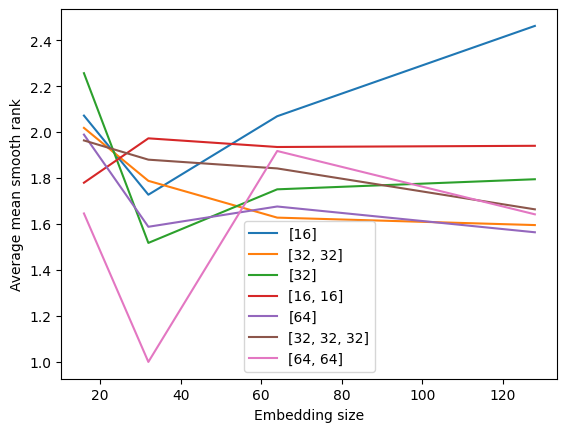

In [54]:
GNN_results = GNN_results.sort_values("embeddings_size")
for h in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == h)
        & (GNN_results["out_size"] != 16)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["avg_mean_smooth_rank"],
        label=h,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("Average mean smooth rank")

Text(0, 0.5, 'F1 score (treshold 0.9)')

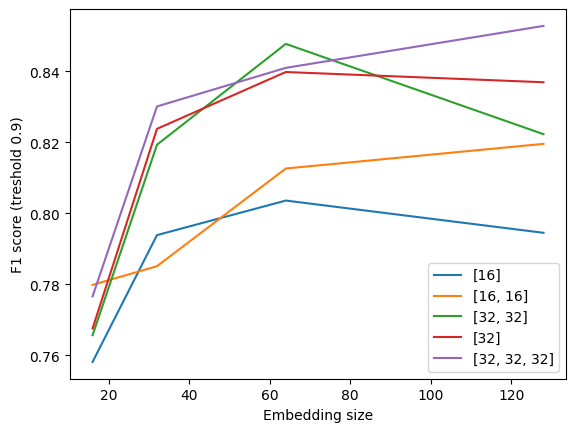

In [52]:
GNN_results = GNN_results.sort_values("embeddings_size")
for h in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == h)
        & (GNN_results["out_size"] == 32)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["f1_0.9"],
        label=h,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("F1 score (treshold 0.9)")

Text(0, 0.5, 'Area under ROC')

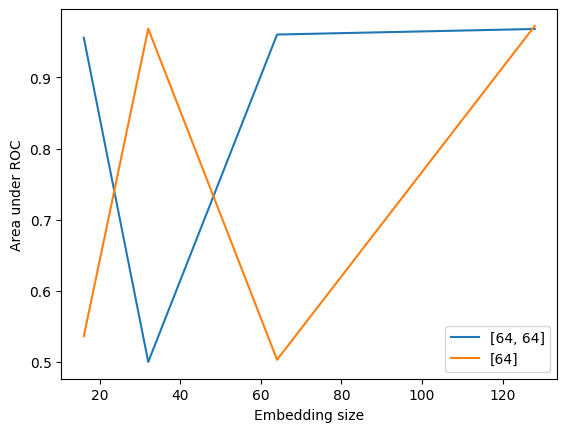

In [46]:
GNN_results = GNN_results.sort_values("embeddings_size")
for N in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == N)
        & (GNN_results["out_size"] == 64)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["area_under_roc"],
        label=N,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("Area under ROC")

Text(0, 0.5, 'Average minimal rank')

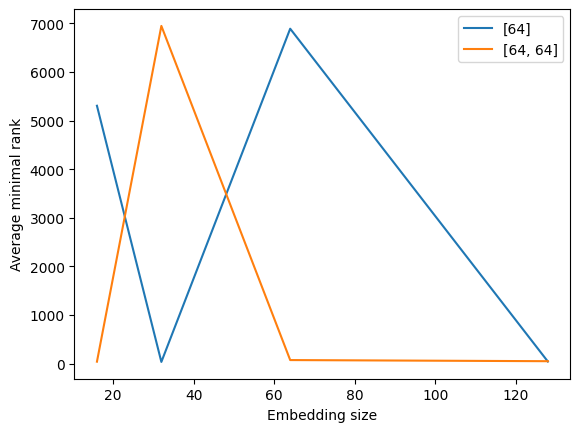

In [47]:
GNN_results = GNN_results.sort_values("embeddings_size")
for N in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == N)
        & (GNN_results["out_size"] == 64)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["avg_min_rank"],
        label=N,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("Average minimal rank")

Text(0, 0.5, 'Average mean rank')

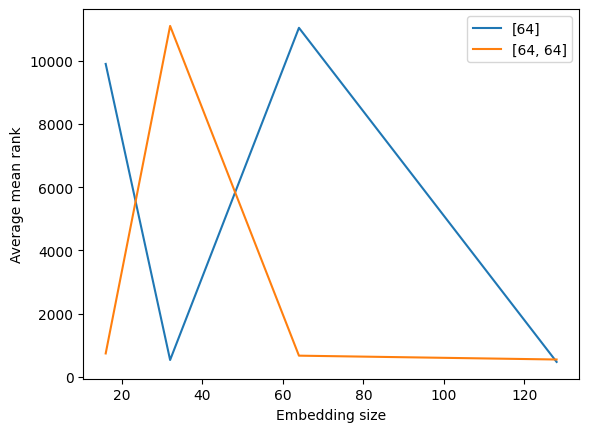

In [48]:
GNN_results = GNN_results.sort_values("embeddings_size")
for N in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == N)
        & (GNN_results["out_size"] == 64)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["avg_mean_rank"],
        label=N,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("Average mean rank")

Text(0, 0.5, 'Average minimal smooth rank')

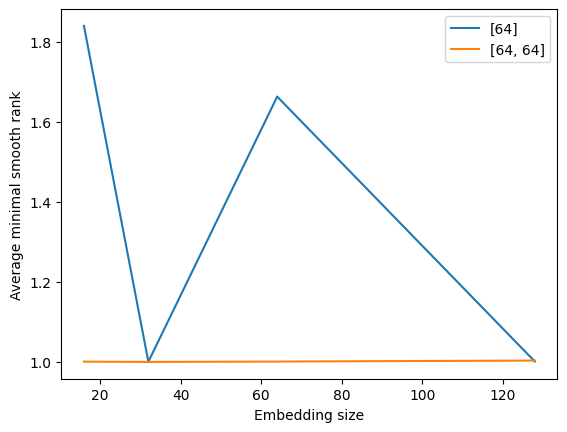

In [50]:
GNN_results = GNN_results.sort_values("embeddings_size")
for N in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == N)
        & (GNN_results["out_size"] == 64)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["avg_min_smooth_rank"],
        label=N,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("Average minimal smooth rank")

Text(0, 0.5, 'Average mean smooth rank')

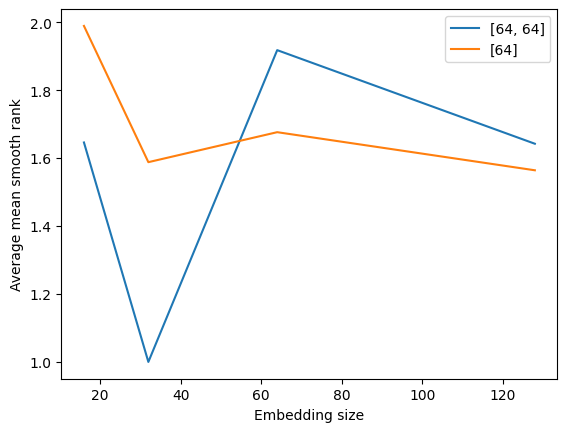

In [51]:
GNN_results = GNN_results.sort_values("embeddings_size")
for N in GNN_results.hidden_size.unique():
    criterion1 = (
        (GNN_results["hidden_size"] == N)
        & (GNN_results["out_size"] == 64)
        & (GNN_results["n_epochs"] == 20000)
    )
    if GNN_results[criterion1].empty:
        continue
    plt.plot(
        GNN_results[criterion1]["embeddings_size"],
        GNN_results[criterion1]["avg_mean_smooth_rank"],
        label=N,
    )
plt.legend()
plt.title("")
plt.xlabel("Embedding size")
plt.ylabel("Average mean smooth rank")